In [74]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Date : (DD/MM/YYYY) Day, month ('june' to
'september'), year (2012) Weather data observations

2.Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3.RH : Relative Humidity in %: 21 to 90

4.Ws :Wind speed in km/h: 6 to 29

5.Rain: total day in mm: 0 to 16.8 FWI Components

6.Fine Fuel Moisture Code (FFMC) index from the FWI

7.system: 28.6 to 92.5

8.Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

9.Drought Code (DC) index from the FWI system: 7 to 220.4

10.Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

11.Buildup Index (BUI) index from the FWI system: 1.1 to 68

12.Fire Weather Index (FWI) Index: 0 to 31.1

13Classes: two classes, namely Fire and not Fire








In [75]:

# Step 1: Load the data
df=pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

In [76]:
df.head() # display top 5 rows of the data frame

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [77]:
# Step 3: Feature engineering/preprocessing
df.drop(['day', 'month', 'year'], axis=1, inplace=True) # as day month and year are not neccessary , hence removing the columns

In [78]:
df['Classes'].value_counts()
#the above code counts the total number of valuez in class column

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [79]:
df['Region'].value_counts()#the above code counts the total number of valuez in region column


Region
0    122
1    121
Name: count, dtype: int64

In [80]:
# Step 2: cleaning the data
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1) #cleaning the data and filling all not fire ,positions with zero and all others with one

In [81]:
df.tail()#shows the last 5 columns


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [82]:
df['Classes'].value_counts() #now after cleaning data we can see that we have all the values for classes as 0 and 1


Classes
1    137
0    106
Name: count, dtype: int64

In [83]:
# step 4 Data Exploration/Visualizations
# Univariate, BiVariate & Multi Variate

<ipython-input-84-fa8da0ff2f5e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


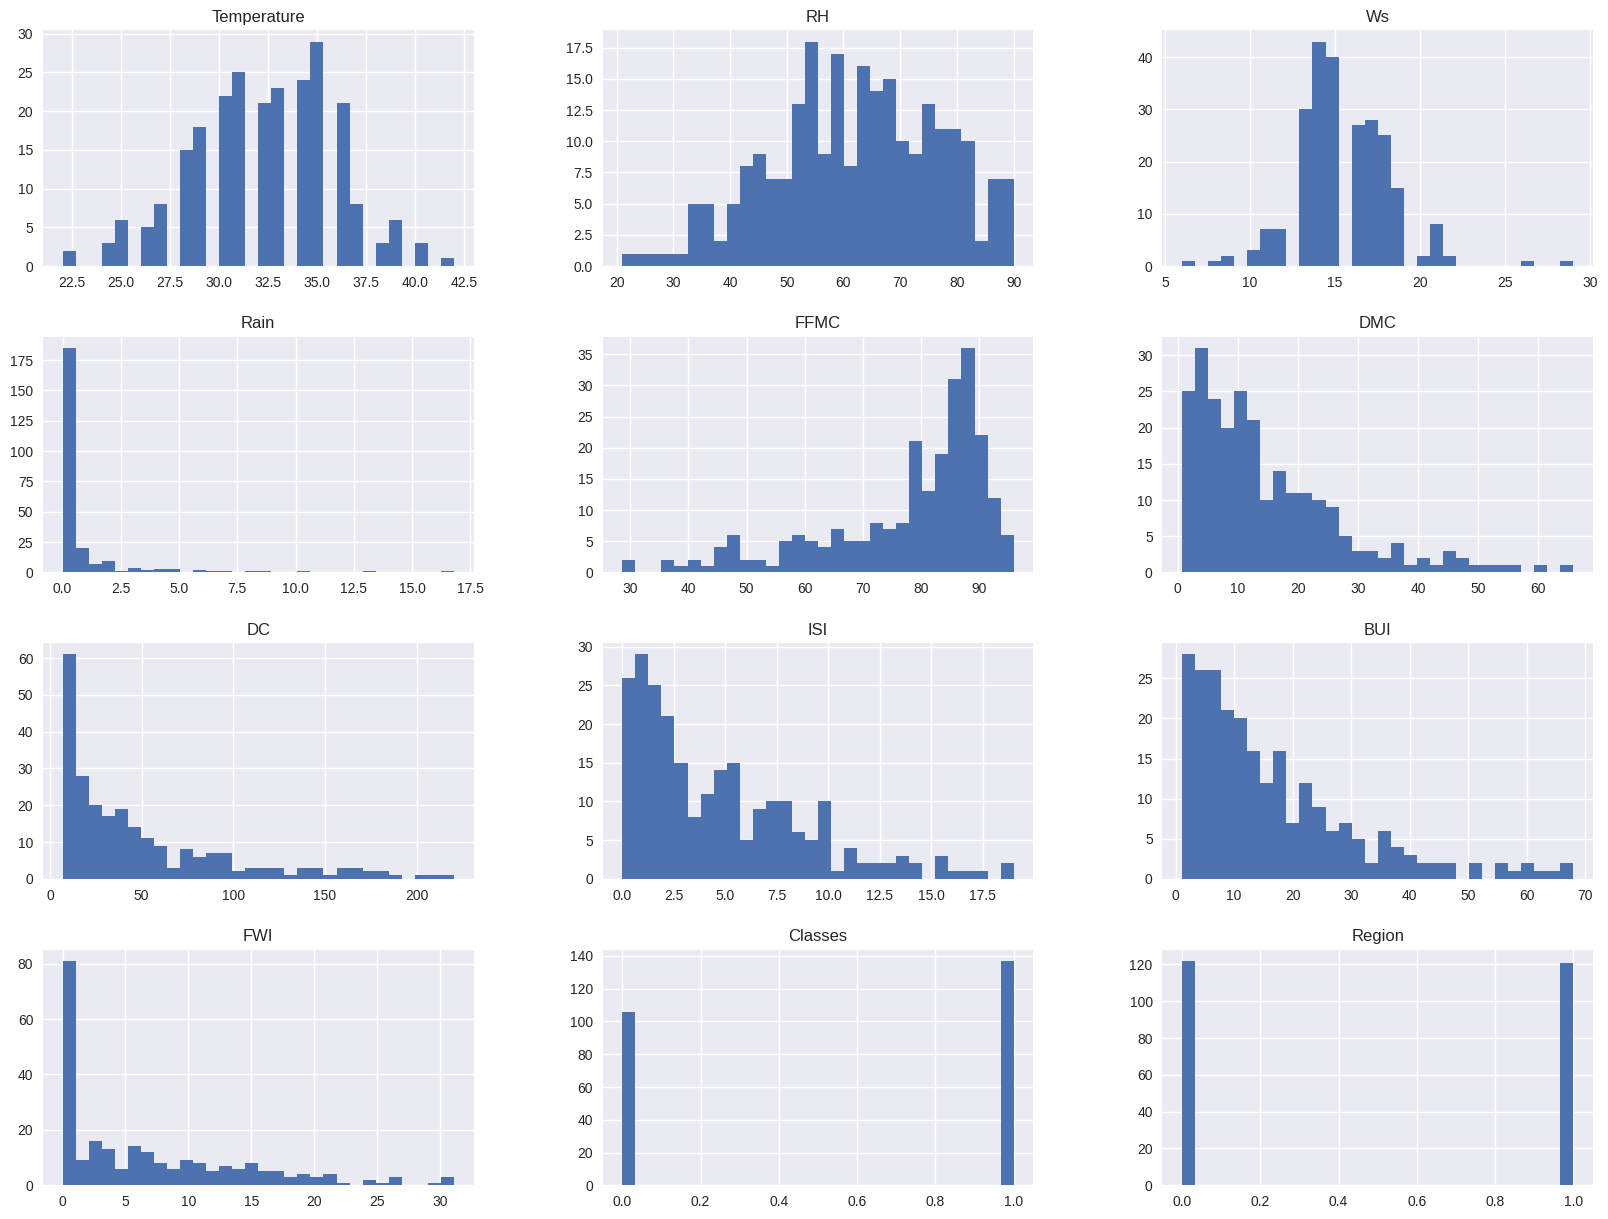

In [84]:
# Univariate Analysis
#using below code we show the univariate anlysis
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))
plt.show()

<Axes: >

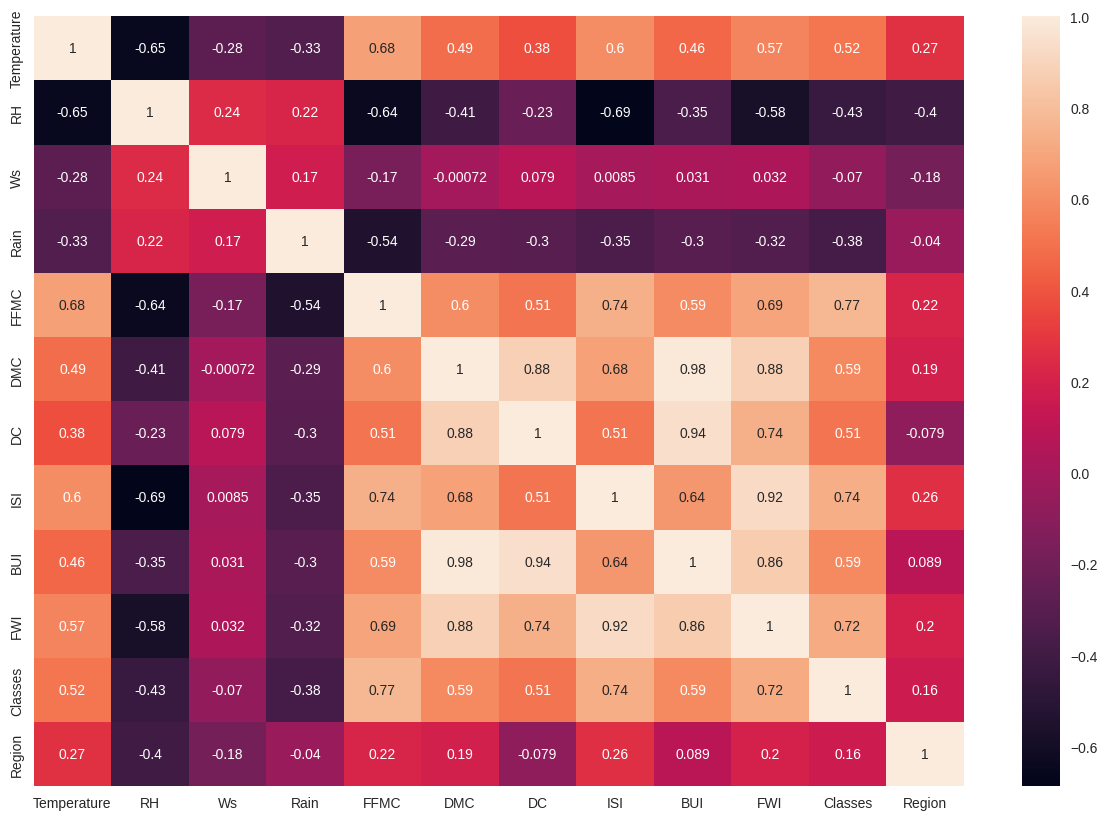

In [85]:
#the below code is used for showing heat map which shows the corelation of one varibale with unother variable to find co-linearity (multivariate Analysis)
plt.figure (figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [86]:
#from the below two queries we get to know that we donot have null and duplicate data hence we can start with model building
df.isnull().sum() #summing all the null values

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [87]:
df.duplicated().sum()#summing all the duplicate values

0

In [88]:
# Feature Engineering
# Multi COllinearity (All IV should be independent to each other)

In [89]:

# Going to drop 'DC' & 'BUI' from df because of multicollinearity with 'DMC'
df.drop(['DC', 'BUI'], axis=1, inplace=True)

In [90]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


In [91]:

# Step 6 Split IV and DV from dataset.

In [92]:
y=df['FWI'] #dependent variable

X=df.drop(['FWI'], axis=1,) #indipendednt variables

In [93]:
X.shape, y.shape #shows the shape of the data frame

((243, 9), (243,))

In [94]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0


In [95]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [96]:

from sklearn.model_selection import train_test_split

# step 7 split the data into two parts Train & test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42) #divide our data from X and y data frames into test and train categories for both dependent and indipendendt variable , keeping the size of test dataset as 20 %
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((194, 9), (49, 9), (194,), (49,))

In [97]:
# step 8 Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# object fo standard scaler

X_train_sc=scaler.fit_transform(X_train)#using the object we fit the data and scale it
X_test_sc=scaler.transform(X_test)#we transform the data to make it scaled

In [98]:
X_train_sc

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

In [99]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


<ipython-input-100-0099931062b5>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

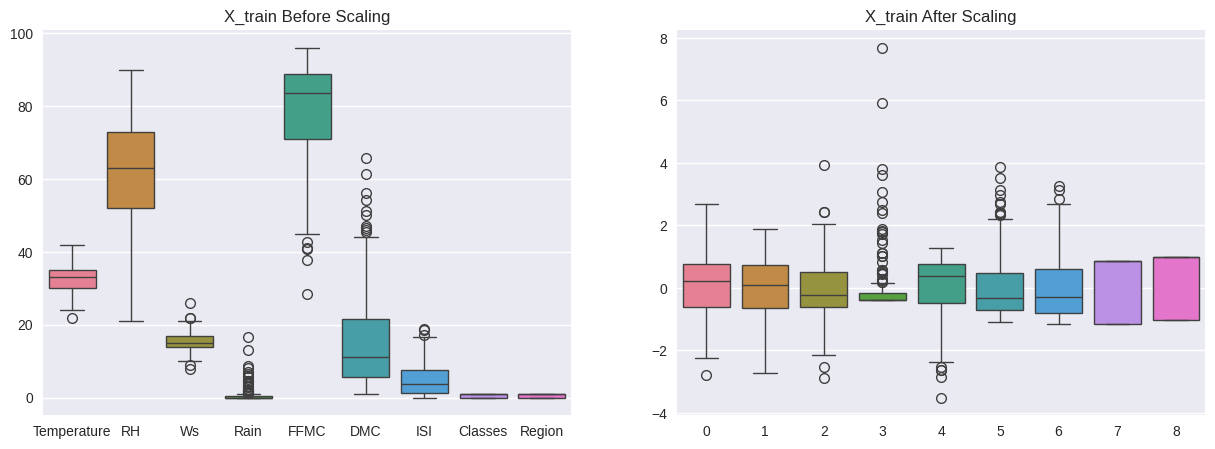

In [100]:
#the below code shows the difference between data before and after scaling and what is the actual use of scaling.

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')

In [101]:
# step 9 is called Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error#we imported the required metrics from the library.

In [102]:
#__________________ MultiLINEAR REGRESSION______________________________
lin_reg=LinearRegression()
#we started a object of linear regressor

In [103]:
# Train my model with scaled training data
lin_reg.fit(X_train_sc, y_train)

LinearRegression()

In [104]:
lin_reg.coef_
#coefficients of liner regressor

array([-0.02653611, -0.1808412 , -0.01415259, -0.0330928 , -0.82478219,
        3.80917655,  4.89287492,  0.39085739, -0.4004259 ])

In [105]:
lin_reg.intercept_ #intercept of best fit line


7.420103092783505

In [106]:
y_pred=lin_reg.predict(X_test_sc) #predicting the outcome values of test data.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


print(f'R2 Score: {r2_score(y_test, y_pred)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')



R2 Score: 0.9805895859259882
MAE: 0.5049978694165687
MSE: 0.5882990110708693
RMSE: 0.7670065260940544


In [107]:
X_test_sc.shape, y_test.shape, y_pred.shape, X_train_sc.shape

((49, 9), (49,), (49,), (194, 9))

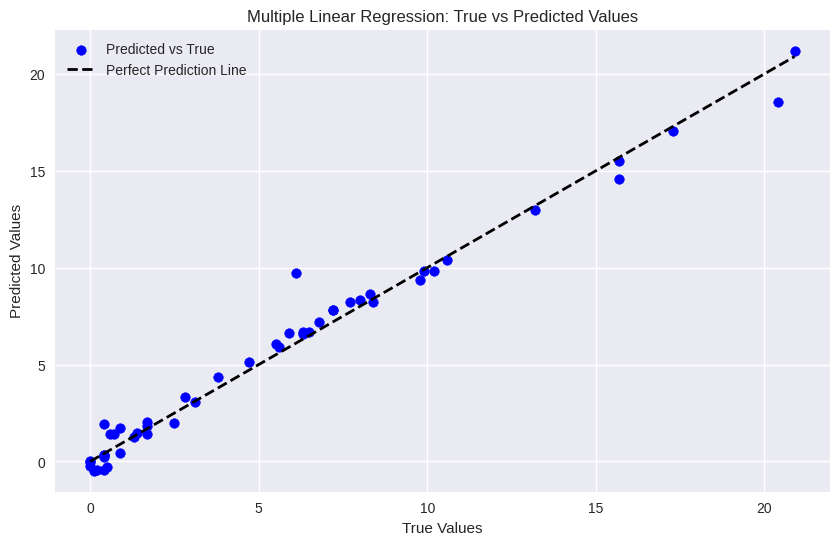

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()

In [109]:
# ________________________polynomial Regression_________________________________

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias= False)
X_train_poly = poly.fit_transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)

In [110]:
X_train_poly.shape ,y_train.shape

((194, 54), (194,))

In [111]:
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [112]:
# Predict on the test set
y_pred_poly = lin_reg.predict(X_test_poly)

In [113]:
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.9926020022912503
MAE: 0.3318517334607182
MSE: 0.22422163274657392
RMSE: 0.47352046708307544


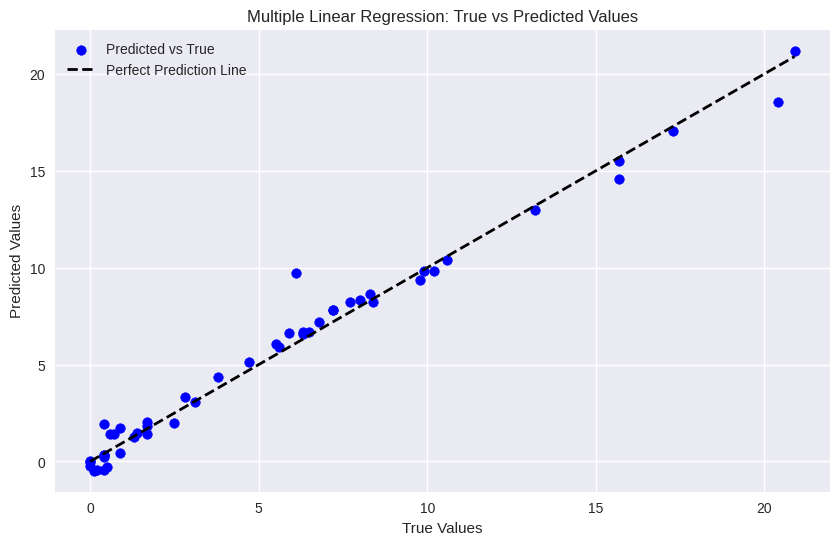

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True') #plots the true values against the predicted values.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')#Reference Line: plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) adds a diagonal line representing perfect
plt.xlabel('True Values')#Labels and Title: plt.xlabel, plt.ylabel, and plt.title are used to label the axes and give a title to the plot.
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression: True vs Predicted Values')
plt.legend()#plt.legend() adds a legend to differentiate between the points and the reference line.
plt.show()#Show Plot: plt.show() displays the plot.


In [115]:
#_______________RIDGE REGRESSION_________________

In [116]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rd=Ridge(alpha=0.001)

rd.fit(X_train, y_train)

y_pred_rd= rd.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_rd)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_rd)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_rd)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rd))}')

R2 Score: 0.9805894827066366
MAE: 0.5049952322893143
MSE: 0.5883021394864842
RMSE: 0.7670085654583554


In [117]:
for i, col in enumerate(X.columns):
    print(f'{col} : {rd.coef_[i]}')

Temperature : -0.0072820368503727795
RH : -0.012064437918912126
Ws : -0.0053809477545350435
Rain : -0.015888642019734733
FFMC : -0.05855762202743182
DMC : 0.2917850512775551
ISI : 1.1321383248437817
Classes : 0.7887772695617365
Region : -0.800873262283914


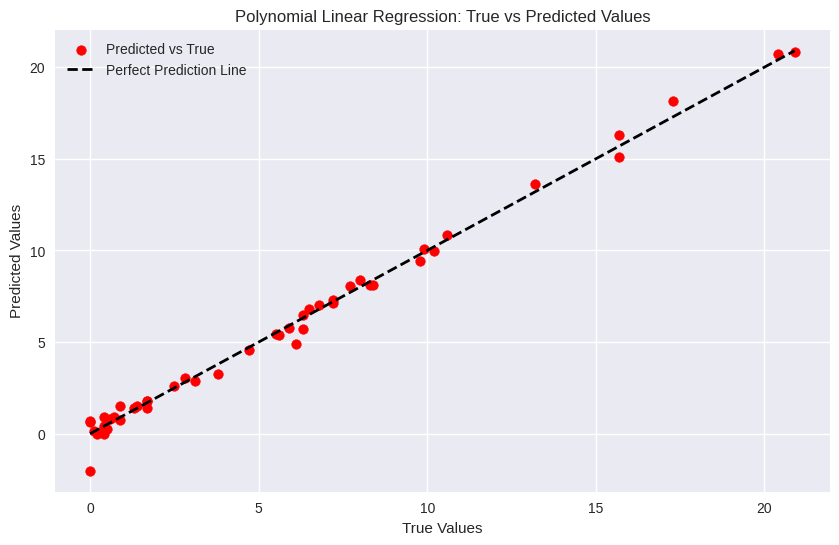

In [118]:
# Plotting True vs Predicted values for Ridge Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='red', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()

In [119]:
#_______lASSO REGRESSION_____________

In [120]:

from sklearn.linear_model import Lasso

In [121]:
ls=Lasso(alpha=0.009)

ls.fit(X_train, y_train)

y_pred_ls= ls.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_ls)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_ls)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_ls)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ls))}')


R2 Score: 0.9804161002244111
MAE: 0.5004568870945169
MSE: 0.593557088836938
RMSE: 0.7704265629097545


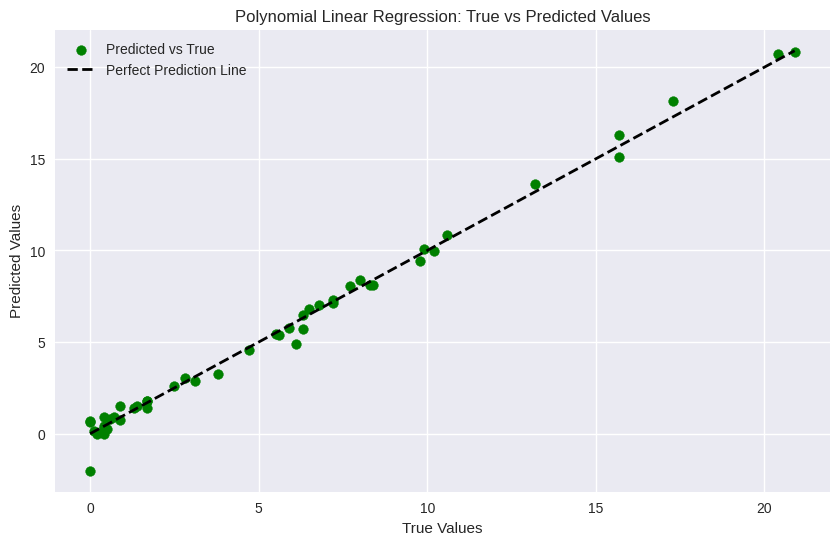

In [122]:
# Plotting True vs Predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='green', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()

In [123]:
#____________ELASTIC NET_________________________

In [124]:
en=ElasticNet(alpha=0.09, l1_ratio=1)

en.fit(X_train, y_train)

y_pred_en= en.predict(X_test)

print(f'R2 Score: {r2_score(y_test, y_pred_en)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_en)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_en)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_en))}')

R2 Score: 0.9754288538267589
MAE: 0.533753846841042
MSE: 0.744712654736678
RMSE: 0.862967354386409


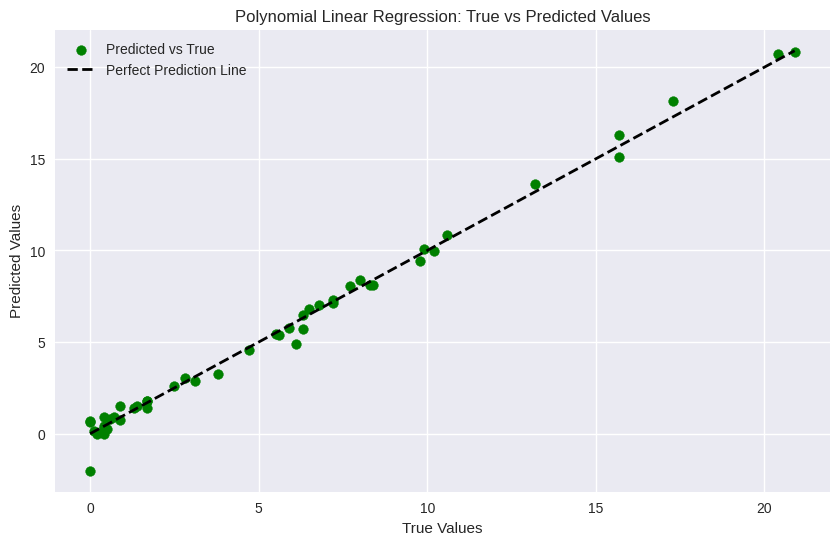

In [125]:
# Plotting True vs Predicted values for Elastic net Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='green', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Linear Regression: True vs Predicted Values')
plt.legend()
plt.show()

# Best fit line equation is given below

Predicted_FWI= -0.026 * Temp - 0.18 * RH - 0.014 * Ws - 0.033 * Rain - 0.824 * FFMC + 3.81 * DMC + 4.89 * ISI + 0.39 * Classes - 0.40 * Region + 7.42


In [126]:
#______________________GRID SERACH CROSSS VALIDAION_____________________________________

In [127]:
from sklearn.model_selection import GridSearchCV

grid= GridSearchCV(estimator=LinearRegression(),param_grid={'fit_intercept':[True,False]},cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [128]:
grid.best_params_


{'fit_intercept': True}

In [129]:
grid.best_score_

-2.399194245274476

In [130]:
# define the model names
models={
    'Linear_reg':LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'EN':ElasticNet()
    }

# define the hyperparameter grid for each model

param_grids={
    'Linear_reg':{'fit_intercept': [True, False]},
    'Ridge':{'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
    'Lasso':{'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
    'EN': {'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

}


best_estimators={}
best_scores={}

for name, model in models.items():
  print(f"performing grid search for {name}.....") #prints the name of regression

#Below code shows the grid serach CV
  grid=GridSearchCV(estimator=model,param_grid=param_grids[name],cv=5,scoring='neg_mean_squared_error')
  grid.fit(X_train,y_train)

#below code gives the best setimator and predict using best estimator
  best_estimators[name]=grid.best_estimator_
  best_scores[name]=mean_squared_error(y_test,grid.best_estimator_.predict(X_test))

  print(f"Best model:{name}")
  print(f"Best params:{grid.best_params_}")
  print(f'Test MSE:{best_scores[name]}\n')









performing grid search for Linear_reg.....
Best model:Linear_reg
Best params:{'fit_intercept': True}
Test MSE:0.5882990110708678

performing grid search for Ridge.....
Best model:Ridge
Best params:{'alpha': 0.9}
Test MSE:0.5912679681019816

performing grid search for Lasso.....
Best model:Lasso
Best params:{'alpha': 0.1}
Test MSE:0.7588416491755405

performing grid search for EN.....
Best model:EN
Best params:{'alpha': 0.1, 'l1_ratio': 0.1}
Test MSE:0.6724120386242546



In [131]:
# step 11 To write the pickle files for the future prediction
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(lin_reg,open('lin_reg.pkl', 'wb'))
pickle.dump(rd,open('rd.pkl', 'wb'))
pickle.dump(ls,open('ls.pkl', 'wb'))
pickle.dump(en,open('en.pkl', 'wb'))
pickle.dump(poly,open('poly.pkl', 'wb'))


In [132]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the scaler and models from pickle files
scaler = pickle.load(open('scaler.pkl', 'rb'))
lin_reg = pickle.load(open('lin_reg.pkl', 'rb'))
ridge_reg = pickle.load(open('rd.pkl', 'rb'))
lasso_reg = pickle.load(open('ls.pkl', 'rb'))
elastic_net_reg = pickle.load(open('en.pkl', 'rb'))
poly_features = pickle.load(open('poly.pkl', 'rb'))

# Generate unseen input data similar to the training data
unseen_data = pd.DataFrame({
    'Temperature': [30, 31, 28],
    'RH': [65, 70, 55],
    'Ws': [10, 15, 12],
    'Rain': [0.2, 0.0, 0.5],
    'FFMC': [85.0, 90.0, 80.0],
    'DMC': [10.0, 12.0, 8.0],
    'ISI': [1.5, 2.0, 1.0],
    'Classes': [1, 0, 1],
    'Region': [0, 1, 0]
})

# Standardize the unseen data
unseen_data_scaled = scaler.transform(unseen_data)

# For Polynomial Regression, we need to transform the scaled data
unseen_data_poly = poly_features.transform(unseen_data_scaled)

# Predict FWI using Linear Regression
fwi_lin_reg = lin_reg.predict(unseen_data_poly)
print("Linear Regression Predictions: ", fwi_lin_reg)

# Predict FWI using Ridge Regression
fwi_ridge_reg = ridge_reg.predict(unseen_data_scaled)
print("Ridge Regression Predictions: ", fwi_ridge_reg)

# Predict FWI using Lasso Regression
fwi_lasso_reg = lasso_reg.predict(unseen_data_scaled)
print("Lasso Regression Predictions: ", fwi_lasso_reg)

# Predict FWI using Elastic Net Regression
fwi_elastic_net_reg = elastic_net_reg.predict(unseen_data_scaled)
print("Elastic Net Regression Predictions: ", fwi_elastic_net_reg)


Linear Regression Predictions:  [1.25900841 2.93113518 0.66204643]
Ridge Regression Predictions:  [3.464887   0.41130572 3.31565823]
Lasso Regression Predictions:  [2.81249966 0.11882962 2.66132742]
Elastic Net Regression Predictions:  [-0.32340224 -0.87080051 -0.4885296 ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


we will use a decision tree regressor ,

**bold text**PART-2 Descision tree regressor

In [133]:
 #makeing a  descion tree regressor with hyperparameter tunning so i can get maximum R2 score

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the decision tree regressor
tree_reg = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print('R^2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))



Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 9}
Best Model: DecisionTreeRegressor(max_depth=9)
R^2: 0.8849237129266082
MAE: 1.1877551020408164
MSE: 3.487780612244897
RMSE: 1.8675600692467422


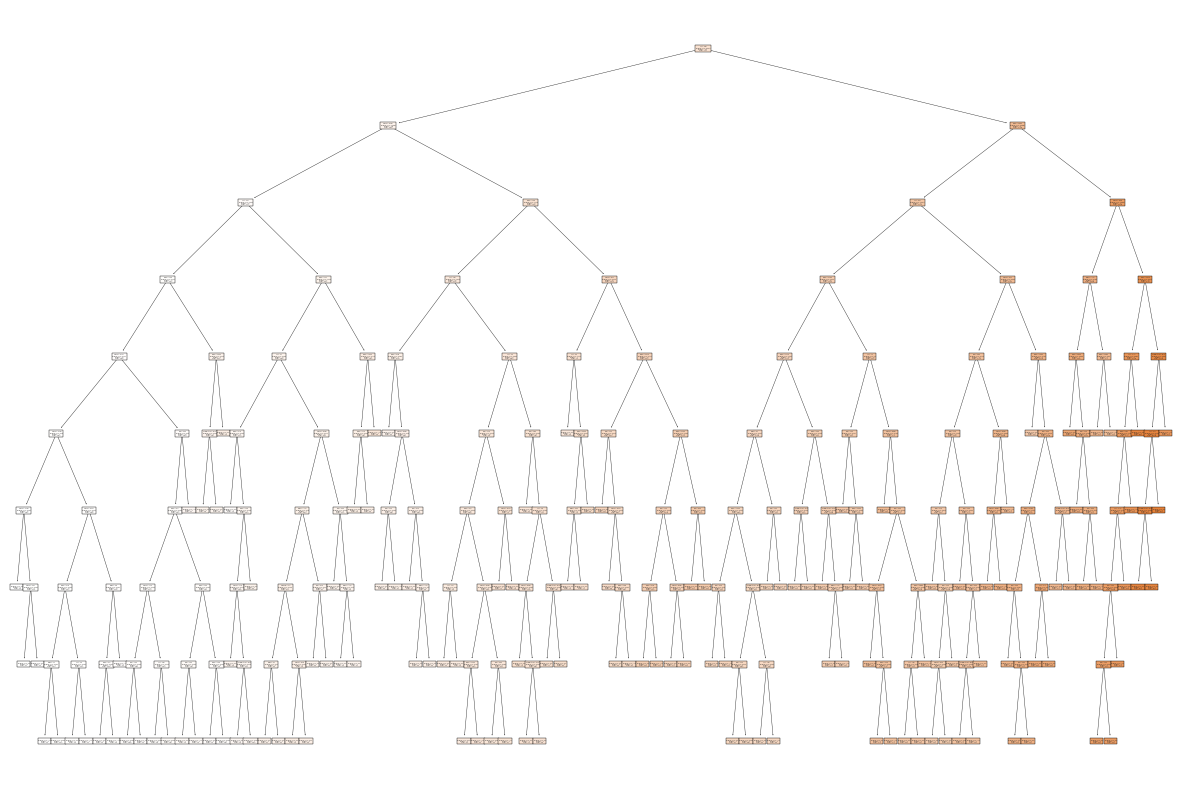

In [134]:
#visualise the tree by plotting
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model, filled="True", feature_names=X.columns)
plt.show()

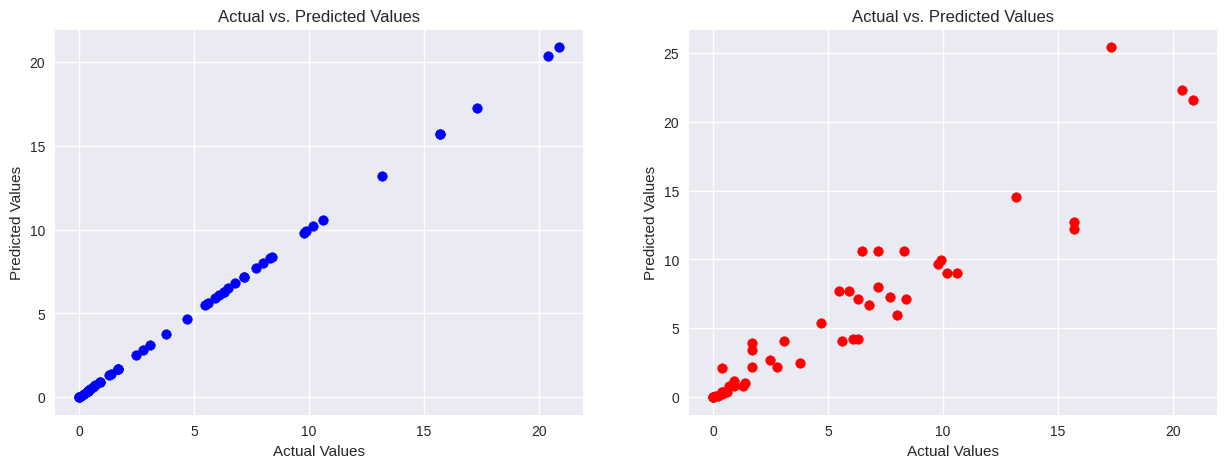

In [135]:
# oloured plot for the predicted and actual values for descsion tree above

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the actual values on the first subplot
ax1.scatter(y_test, y_test, color='blue', label='Actual Values')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Actual vs. Predicted Values')

# Plot the predicted values on the second subplot
ax2.scatter(y_test, y_pred, color='red', label='Predicted Values')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Actual vs. Predicted Values')

# Show the plot
plt.show()


In [136]:

# makeing a pickle file for above descision tree regressor

# Load the best model
best_model = grid_search.best_estimator_

# Save the model to a pickle file
with open('decision_tree_regressor.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [139]:
#Test the above given random unseen data for the best model name it as descision tree regressor


# Load the best model
with open('decision_tree_regressor.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Generate unseen input data similar to the training data
unseen_data = pd.DataFrame({
    'Temperature': [30, 31, 28],
    'RH': [65, 70, 55],
    'Ws': [10, 15, 12],
    'Rain': [0.2, 0.0, 0.5],
    'FFMC': [85.0, 90.0, 80.0],
    'DMC': [10.0, 12.0, 8.0],
    'ISI': [1.5, 2.0, 1.0],
    'Classes': [1, 0, 1],
    'Region': [0, 1, 0]
})

# Make predictions on the unseen data
y_pred = best_model.predict(unseen_data)

# Print the predictions
print("Predictions:", y_pred)


Predictions: [4.1 3.9 0.8]


In [ ]:
#BELOW IS THE GITHUB LINK FOR REPOSITORY

https://github.com/Rewant-Sharma/Algerian_Fire_Project_New